In [3]:
#Input variables:

# fixed acidity
# volatile acidity
# citric acid
# residual sugar
# chlorides
# free sulfur dioxide
# total sulfur dioxide
# density
# pH
# sulphates
# alcohol Output variable:
# quality (score between 0 and 10)

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [5]:
red_wine_data=pd.read_csv('https://raw.githubusercontent.com/btkhimsar/DataSets/master/winequality-red.csv',sep=';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Find out the total number of rows and columns in the dataset using “.shape”
red_wine_data.shape

(1599, 12)

In [7]:
#Get a Statistical Overview using Describe
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploring the Features/Variables

In [8]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Unique Values of Quality(Target Variable)

In [9]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
red_wine_data['quality'].nunique()

6

### Frequency Counts of each Quality Value

In [11]:
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Renaming Columns

In [12]:
red_wine_data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Checking for Missing Values

In [13]:
red_wine_data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
red_wine_data.isnull().sum()
#Observation: There is no missing value in any column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Checking for Duplicates

In [16]:
duplicate=red_wine_data[red_wine_data.duplicated()]
duplicate.shape
#There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

(240, 12)

### Separating Input and Target Variables

In [17]:
Y=red_wine_data['quality']
X=red_wine_data.drop(red_wine_data['quality'],inplace=True)

### Data Visualization Or Graphical Representation`

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

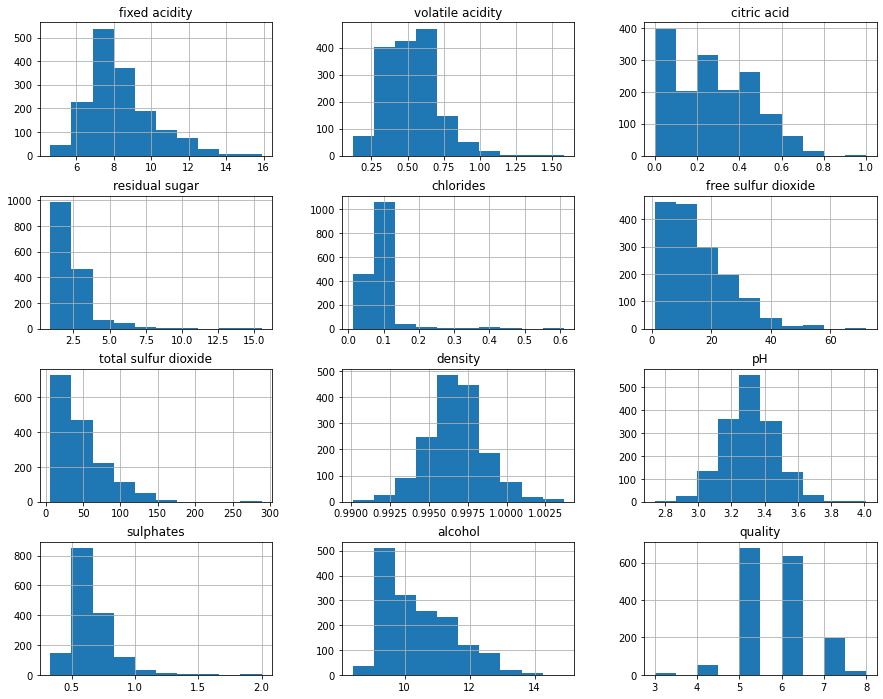

In [19]:
red_wine_data.hist(bins=10,figsize=(15,12))
plt.show()

### Correlation Matrix with Heatmap

In [20]:
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254398,0.671410,0.114616,0.093650,-0.154536,-0.114387,0.668582,-0.682678,0.182851,-0.062303,0.124330
volatile acidity,-0.254398,1.000000,-0.551206,0.002691,0.061790,-0.009841,0.077683,0.022580,0.233098,-0.260545,-0.201714,-0.391616
citric acid,0.671410,-0.551206,1.000000,0.142135,0.203428,-0.062613,0.033668,0.365729,-0.540720,0.311429,0.107572,0.228214
residual sugar,0.114616,0.002691,0.142135,1.000000,0.054904,0.186785,0.202718,0.355577,-0.084971,0.003772,0.040552,0.014504
chlorides,0.093650,0.061790,0.203428,0.054904,1.000000,0.005293,0.047110,0.200734,-0.265023,0.370793,-0.222395,-0.128786
free sulfur dioxide,-0.154536,-0.009841,-0.062613,0.186785,0.005293,1.000000,0.667660,-0.021810,0.071316,0.051157,-0.070349,-0.050443
total sulfur dioxide,-0.114387,0.077683,0.033668,0.202718,0.047110,0.667660,1.000000,0.070902,-0.065474,0.042388,-0.206664,-0.184133
density,0.668582,0.022580,0.365729,0.355577,0.200734,-0.021810,0.070902,1.000000,-0.342598,0.148474,-0.496641,-0.174029
pH,-0.682678,0.233098,-0.540720,-0.084971,-0.265023,0.071316,-0.065474,-0.342598,1.000000,-0.196103,0.207645,-0.057320
sulphates,0.182851,-0.260545,0.311429,0.003772,0.370793,0.051157,0.042388,0.148474,-0.196103,1.000000,0.091686,0.253019


<AxesSubplot:>

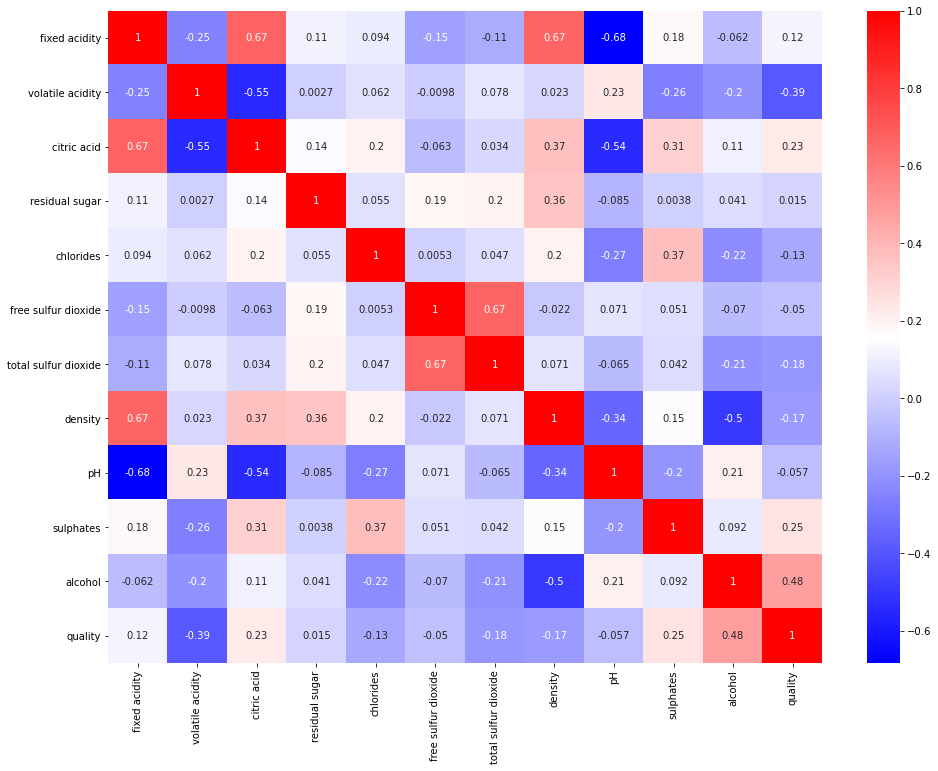

In [21]:
#Creating a pictorial visualisation of the above correlation matrix using a heatmap
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(),cmap='bwr',annot=True)

### Pair Plot

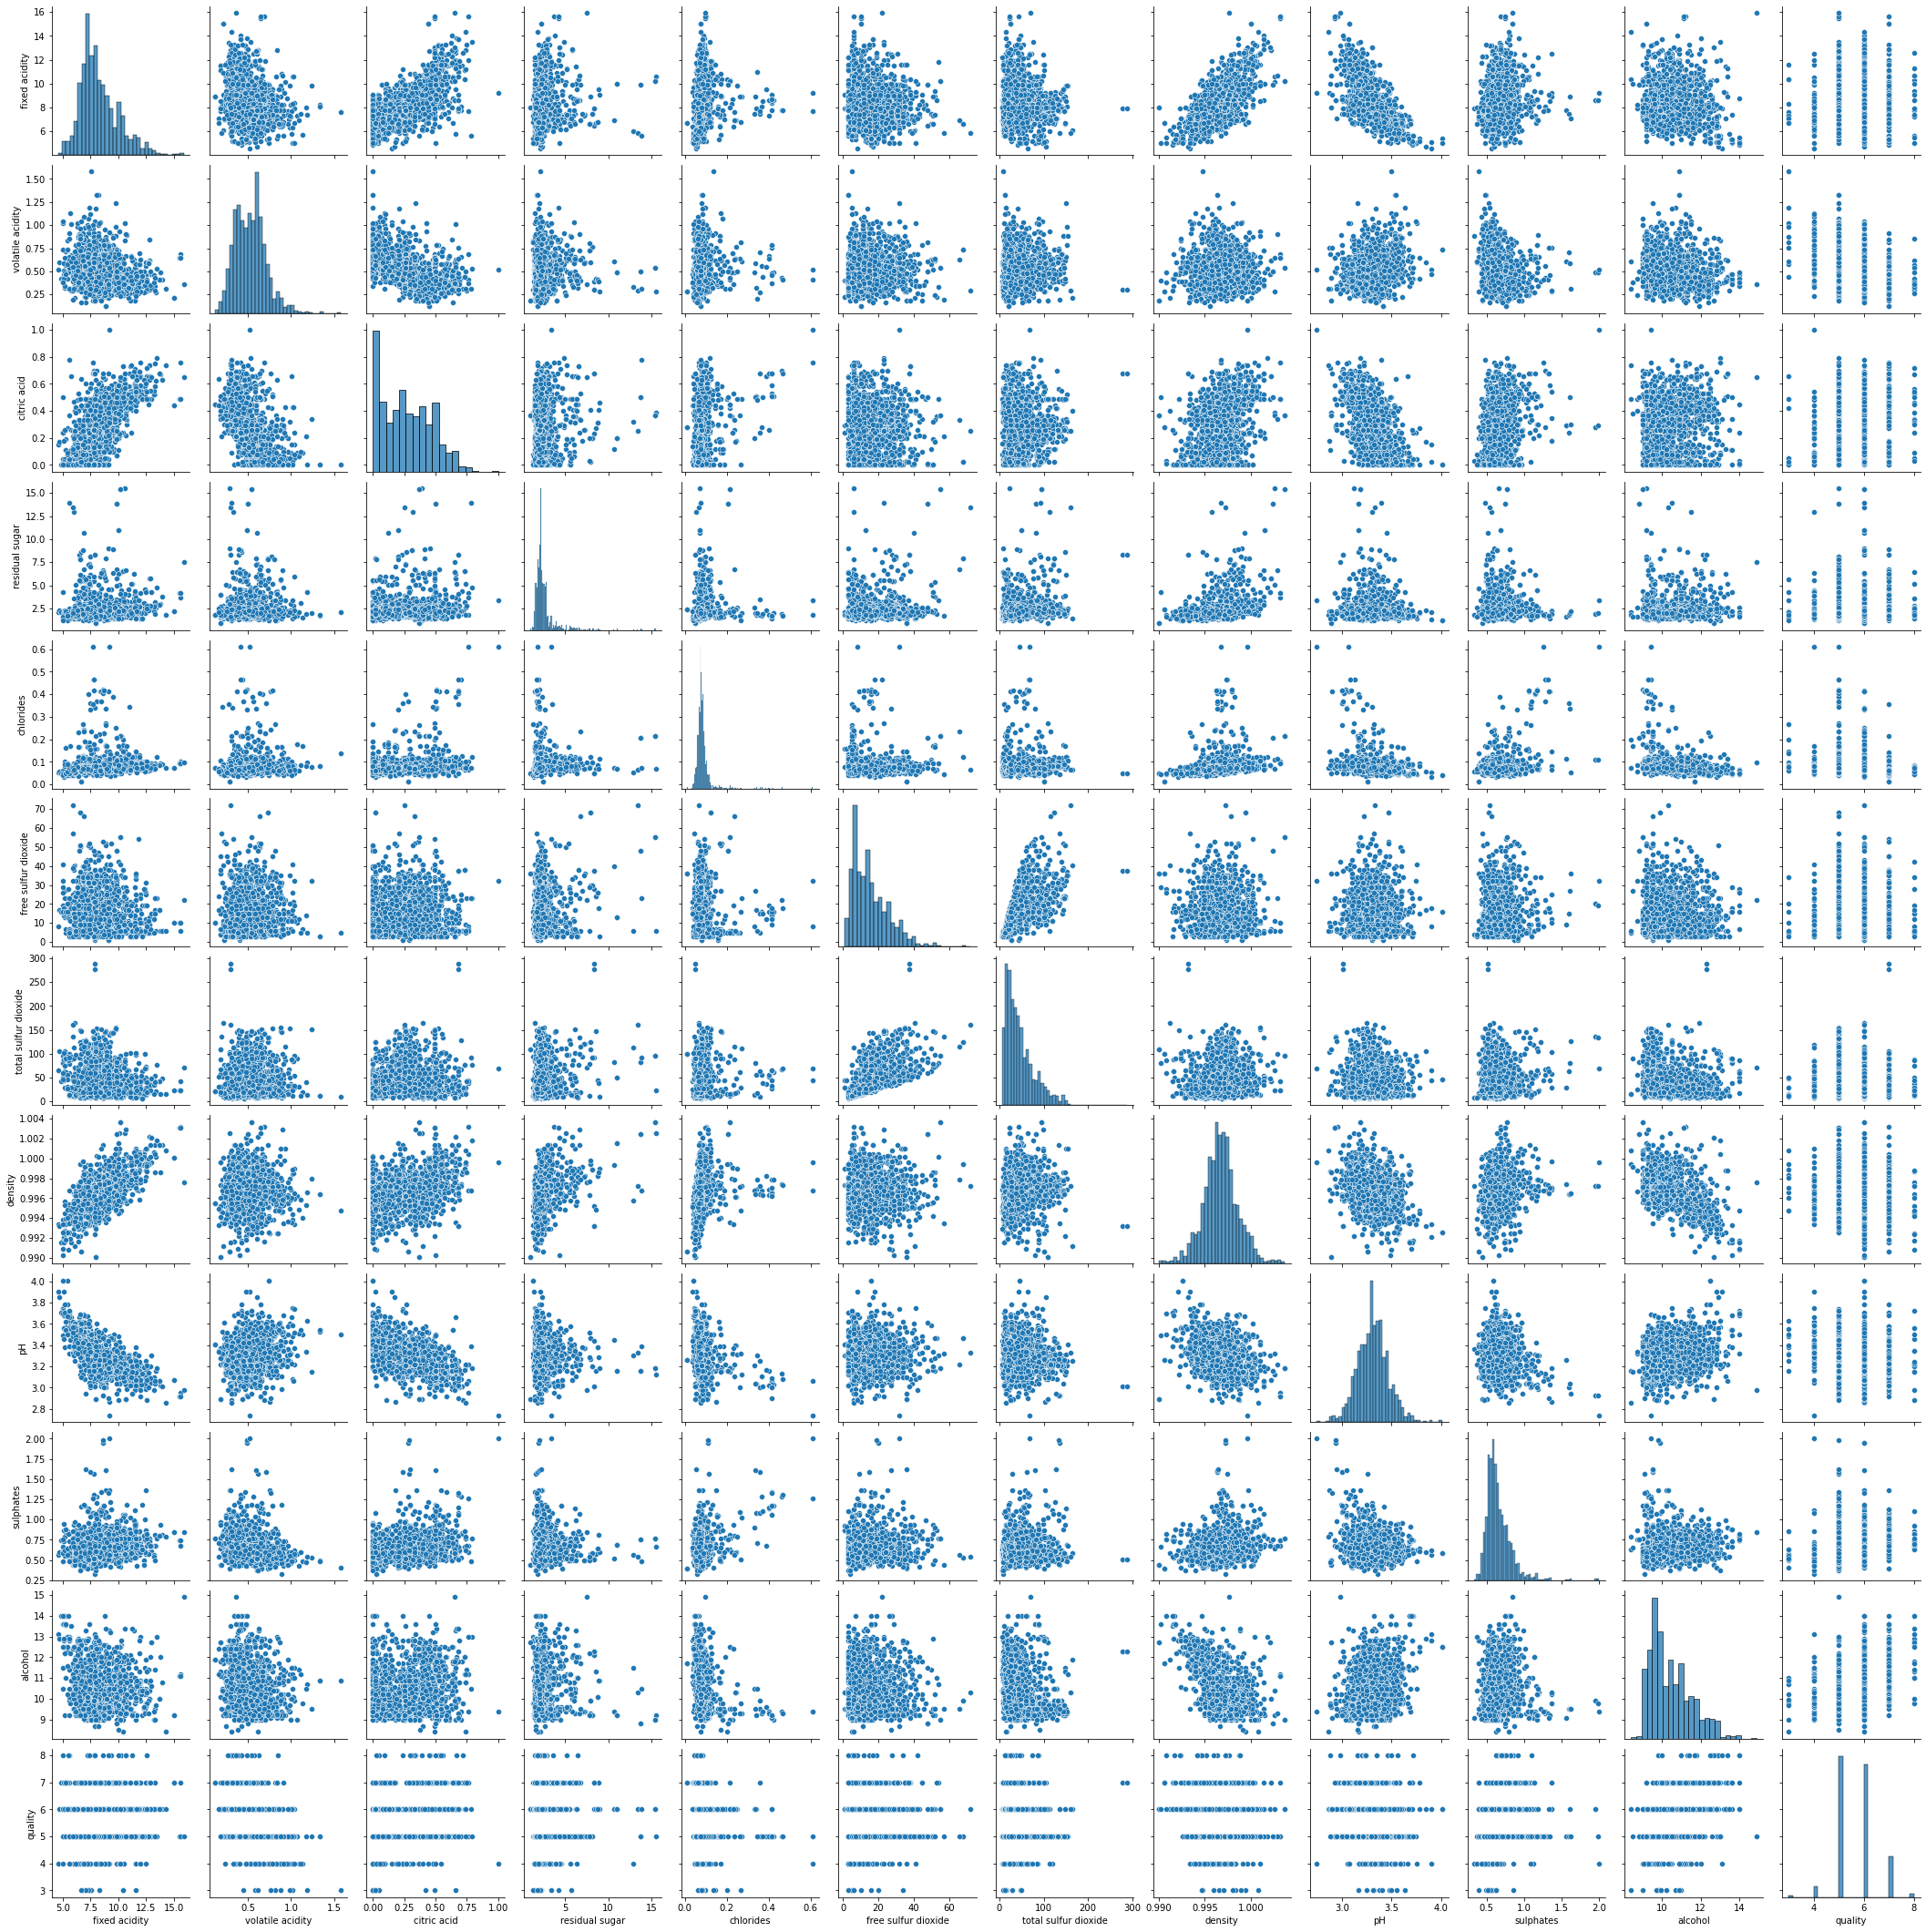

In [22]:
sns.pairplot(red_wine_data)

### Box plot

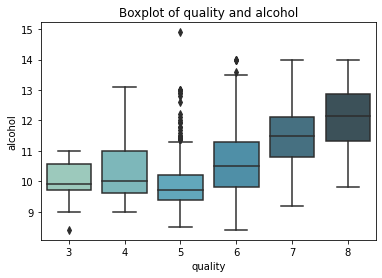

In [23]:
sns.boxplot(Y,red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

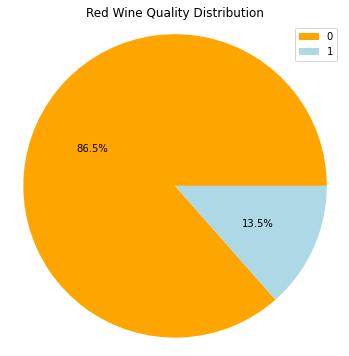

The amount of good quality red wine is  13.5 %.
mean red wine quality =  5.635279347143754


In [118]:
#Grouping data based on grade
red_wine_data['grade']=1
red_wine_data.grade.value_counts()
red_wine_data.grade.unique()
#red_wine_data.grade[red_wine_data.quality<6.5]=0
red_wine_data.loc[(red_wine_data.quality<6.5,'grade')]=0
red_wine_data.grade.unique()

#pie chart
plt.figure(figsize = (6,6))
colors = ['orange', 'lightblue']
labels = red_wine_data.grade.value_counts().index
plt.pie(red_wine_data.grade.value_counts(), autopct='%1.1f%%',colors=colors)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Red Wine Quality Distribution')
plt.show()

print('The amount of good quality red wine is ',round(red_wine_data.grade.value_counts(normalize=True)[1]*100,1),'%.')
print("mean red wine quality = ",red_wine_data["quality"].mean())

In [122]:
print(round(red_wine_data.grade.value_counts()[1]/red_wine_data.grade.value_counts().sum()*100,1))

13.5


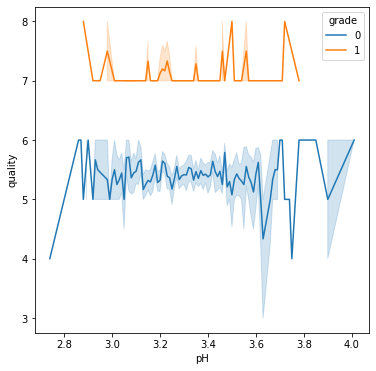

In [66]:
plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=red_wine_data,markers=True)

### Predicting Red Wine Quality using:

1. Random Forest Classifier
2. Gaussian Naive Bayes Classifier
3. Decision Tree Classifier
4. KNeighbors Classifier
5. SVM Classifier

In [67]:
#Defining X and y
X = red_wine_data.drop(['quality'], axis=1)
y = red_wine_data['quality']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)



X_train: (1274, 12)
y_train: (1274,)
X_test: (319, 12)
y_test: (319,)


In [75]:
# 1. Using Random Forest Classifier

# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
print(acc_rf)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

74.92
Random Forest Classifier Accuracy: 74.92163009404389 %


In [76]:
#2. Gaussian Naive Bayes Classifier

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Naive Bayes Accuracy: 71.15987460815047 %


In [77]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Accuracy: 68.96551724137932 %


In [78]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

kNN Accuracy: 52.03761755485894 %


In [79]:
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)

# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

SVM Accuracy: 49.843260188087775 %


[0 1 2 3 4]
5


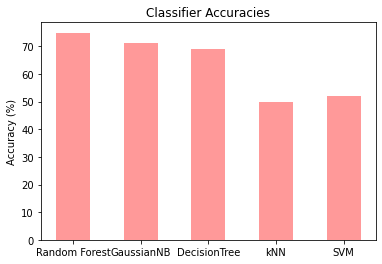

In [101]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
print(x_pos)
print(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_svm,acc_knn]
    
plt.bar(predictors_group, accuracies1,width=0.5, align='center', alpha=0.4, color='red')
#plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

### Reducing overfitting using Cross Validation for top three Algorithms -> RF, DT and GNB

In [103]:
# importing the model for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# creating list of tuple wth model and its name  
models = []
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GNB',GaussianNB()))
models

[('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('GNB', GaussianNB())]

In [124]:
# Import Cross Validation 
from sklearn.model_selection import cross_val_score

# simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
print(kf)

acc = []   # All Algorithm/model accuracies
names = []    # All model name

for name, model in models:
    
    acc_of_model = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling
    
    acc.append(acc_of_model) # appending Accuray of different model to acc List
    
    names.append(name)# appending name of models
    Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
    print(Acc)

KFold(n_splits=5, random_state=42, shuffle=True)
('DT', 70.02)
('RF', 78.02)
('GNB', 66.56)


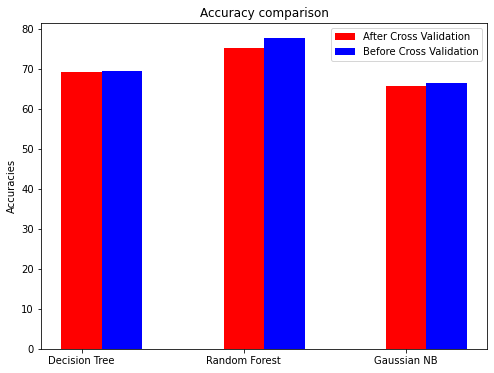

In [112]:
# Plotting all accuracies together for comparison

labels = ['Decision Tree', 'Random Forest','Gaussian NB']

NoCV =[69.49 ,77.65,66.43] # accuracy before Cross Validation
CV=[69.24, 75.14, 65.8] # accuracy after Cross Validation

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

f, ax = plt.subplots(figsize=(8,6)) 
p1 = ax.bar(x, CV, width, label='After Cross Validation', color='red')
p2 = ax.bar(x+width, NoCV, width, label='Before Cross Validation', color='blue')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='upper right')
plt.show()